In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scripts import calc_chute_diameter, list_of_chute_diameters, list_of_velocities

# Manual

In [2]:
MIN_DECENT_MASS = 15
MAX_DECENT_MASS = 25

SEMI_ELLIPSOIDAL_DRAG_COEFFICIENT = 1.6
PARABOLIC_DRAG_COEFFICIENT = 0.97

AIR_DENSITY = 1.22

DROGUE_MIN_VELOCITY = 20  # m/s
DROGUE_MAX_VELOCITY = 50  # m/s
MAIN_MIN_VELOCITY = 4  # m/s
MAIN_MAX_VELOCITY = 11 # m/s

DROGUE_MIN_DIAMETER = 1 # ft
DROGUE_MAX_DIAMETER= 3 # ft

MAIN_MIN_DIAMETER = 7  # ft
MAIN_MAX_DIAMETER = 9  # ft

GRAVITY=9.81
VELOCITY_INCREMENTS=1
DIAMETER_INCREMENTS=1
METRE_TO_FEET=3.281

## Font

In [3]:
plt.rcParams.update({
    'text.usetex': False,
    'text.latex.preamble': r'\usepackage{times}',
    'font.family': 'serif',
    'font.serif': ['Times New Roman', 'Times'],
})

# Drogue

In [4]:
# Create array of thickness values
drogue_velocity_list = np.arange(
    DROGUE_MIN_VELOCITY, DROGUE_MAX_VELOCITY + VELOCITY_INCREMENTS, VELOCITY_INCREMENTS)

# Create array of diameter values
drogue_diameter_list = np.arange(
    DROGUE_MIN_DIAMETER/METRE_TO_FEET, DROGUE_MAX_DIAMETER/METRE_TO_FEET + DIAMETER_INCREMENTS/METRE_TO_FEET, DIAMETER_INCREMENTS/METRE_TO_FEET)*METRE_TO_FEET

## Minimum Weight

In [5]:
drogue_min_chute_diameters= list_of_chute_diameters(minimum_velocity=DROGUE_MIN_VELOCITY, maximum_velocity=DROGUE_MAX_VELOCITY, increments=VELOCITY_INCREMENTS,
                                                    mass=MIN_DECENT_MASS, gravity=GRAVITY, air_density=AIR_DENSITY, drag_coefficient=SEMI_ELLIPSOIDAL_DRAG_COEFFICIENT)

drogue_min_descent_velocities = list_of_velocities(
    minimum_diameter=DROGUE_MIN_DIAMETER/METRE_TO_FEET, maximum_diameter=DROGUE_MAX_DIAMETER/METRE_TO_FEET, increments=DIAMETER_INCREMENTS/METRE_TO_FEET,
    mass=MIN_DECENT_MASS, gravity=GRAVITY, air_density=AIR_DENSITY, drag_coefficient=SEMI_ELLIPSOIDAL_DRAG_COEFFICIENT)

## Maximum Weight

In [6]:
drogue_max_chute_diameters = list_of_chute_diameters(minimum_velocity=DROGUE_MIN_VELOCITY, maximum_velocity=DROGUE_MAX_VELOCITY, increments=VELOCITY_INCREMENTS,
                                                     mass=MAX_DECENT_MASS, gravity=GRAVITY, air_density=AIR_DENSITY, drag_coefficient=SEMI_ELLIPSOIDAL_DRAG_COEFFICIENT)

drogue_max_descent_velocities = list_of_velocities(
    minimum_diameter=DROGUE_MIN_DIAMETER/METRE_TO_FEET, maximum_diameter=DROGUE_MAX_DIAMETER/METRE_TO_FEET, increments=DIAMETER_INCREMENTS/METRE_TO_FEET,
    mass=MAX_DECENT_MASS, gravity=GRAVITY, air_density=AIR_DENSITY, drag_coefficient=SEMI_ELLIPSOIDAL_DRAG_COEFFICIENT)

### Dataframe

In [7]:
# Create a DataFrame with velocities and diameters
drogue_df = pd.DataFrame({
    'Velocity': drogue_velocity_list,
    'Minimum_Parachute_Diameter_m': drogue_min_chute_diameters,
    'Maximum_Parachute_Diameter_m': drogue_max_chute_diameters
})
drogue_df["Minimum_Parachute_Diameter_ft"] = drogue_df["Minimum_Parachute_Diameter_m"]*METRE_TO_FEET
drogue_df["Maximum_Parachute_Diameter_ft"] = drogue_df["Maximum_Parachute_Diameter_m"]*METRE_TO_FEET
display(drogue_df)

# Create a DataFrame with velocities and diameters
drogue_velocity_df = pd.DataFrame({
    'Parachute_Diameter_ft': drogue_diameter_list,
    f'{MIN_DECENT_MASS}kg': drogue_min_descent_velocities,
    f'{MAX_DECENT_MASS}kg': drogue_max_descent_velocities
})
display(drogue_velocity_df)

,Velocity,Minimum_Parachute_Diameter_m,Maximum_Parachute_Diameter_m,Minimum_Parachute_Diameter_ft,Maximum_Parachute_Diameter_ft
0,20,0.692756,0.894344,2.272932,2.934343
1,21,0.659768,0.851756,2.164698,2.794612
2,22,0.629778,0.813040,2.066302,2.667585
3,23,0.602397,0.777691,1.976463,2.551603
4,24,0.577297,0.745287,1.894110,2.445286
5,25,0.554205,0.715475,1.818346,2.347474
6,26,0.532889,0.687957,1.748410,2.257187
7,27,0.513153,0.662477,1.683654,2.173587
8,28,0.494826,0.638817,1.623523,2.095959
9,29,0.477763,0.616789,1.567540,2.023685


,Parachute_Diameter_ft,15kg,25kg
0,1.0,45.458648,58.686862
1,2.0,22.729324,29.343431
2,3.0,15.152883,19.562287


# Main

In [8]:
# Create array of thickness values
main_velocity_list = np.arange(
    MAIN_MIN_VELOCITY, MAIN_MAX_VELOCITY + VELOCITY_INCREMENTS, VELOCITY_INCREMENTS)

# Create array of diameter values
main_diameter_list = np.arange(
    MAIN_MIN_DIAMETER/METRE_TO_FEET, MAIN_MAX_DIAMETER/METRE_TO_FEET + DIAMETER_INCREMENTS/METRE_TO_FEET, DIAMETER_INCREMENTS/METRE_TO_FEET)*METRE_TO_FEET

## Minimum Weight

In [9]:
main_min_chute_diameters = list_of_chute_diameters(minimum_velocity=MAIN_MIN_VELOCITY, maximum_velocity=MAIN_MAX_VELOCITY, increments=VELOCITY_INCREMENTS,
                                                   mass=MIN_DECENT_MASS, gravity=GRAVITY, air_density=AIR_DENSITY, drag_coefficient=PARABOLIC_DRAG_COEFFICIENT)

main_min_descent_velocities = list_of_velocities(
    minimum_diameter=MAIN_MIN_DIAMETER/METRE_TO_FEET, maximum_diameter=MAIN_MAX_DIAMETER/METRE_TO_FEET, increments=DIAMETER_INCREMENTS/METRE_TO_FEET,
    mass=MIN_DECENT_MASS, gravity=GRAVITY, air_density=AIR_DENSITY, drag_coefficient=PARABOLIC_DRAG_COEFFICIENT)

## Maximum Weight

In [10]:
main_max_chute_diameters = list_of_chute_diameters(minimum_velocity=MAIN_MIN_VELOCITY, maximum_velocity=MAIN_MAX_VELOCITY, increments=VELOCITY_INCREMENTS,
                                                   mass=MAX_DECENT_MASS, gravity=GRAVITY, air_density=AIR_DENSITY, drag_coefficient=PARABOLIC_DRAG_COEFFICIENT)

main_max_descent_velocities = list_of_velocities(
    minimum_diameter=MAIN_MIN_DIAMETER/METRE_TO_FEET, maximum_diameter=MAIN_MAX_DIAMETER/METRE_TO_FEET, increments=DIAMETER_INCREMENTS/METRE_TO_FEET,
    mass=MAX_DECENT_MASS, gravity=GRAVITY, air_density=AIR_DENSITY, drag_coefficient=PARABOLIC_DRAG_COEFFICIENT)

In [11]:
print(main_diameter_list)
print(main_min_descent_velocities)
print(main_max_descent_velocities)

[ 7.  8.  9. 10.]
[8.34050982 7.2979461  6.4870632  5.83835688]
[10.76755188  9.4216079   8.37476258  7.53728632]


### Dataframe

In [12]:
# Create a DataFrame with velocities and diameters
main_df = pd.DataFrame({
    'Velocity': main_velocity_list,
    'Minimum_Parachute_Diameter_m': main_min_chute_diameters,
    'Maximum_Parachute_Diameter_m': main_max_chute_diameters
})
main_df["Minimum_Parachute_Diameter_ft"] = main_df["Minimum_Parachute_Diameter_m"]*METRE_TO_FEET
main_df["Maximum_Parachute_Diameter_ft"] = main_df["Maximum_Parachute_Diameter_m"]*METRE_TO_FEET
display(main_df)

# Create a DataFrame with velocities and diameters
main_velocity_df = pd.DataFrame({
    'Parachute_Diameter_ft': main_diameter_list,
    f'{MIN_DECENT_MASS}kg': main_min_descent_velocities,
    f'{MAX_DECENT_MASS}kg': main_max_descent_velocities
})
display(main_velocity_df)


,Velocity,Minimum_Parachute_Diameter_m,Maximum_Parachute_Diameter_m,Minimum_Parachute_Diameter_ft,Maximum_Parachute_Diameter_ft
0,4,4.448611,5.743132,14.595892,18.843216
1,5,3.558889,4.594506,11.676714,15.074573
2,6,2.965741,3.828755,9.730595,12.562144
3,7,2.542063,3.281790,8.340510,10.767552
4,8,2.224305,2.871566,7.297946,9.421608
5,9,1.977160,2.552503,6.487063,8.374763
6,10,1.779444,2.297253,5.838357,7.537286
7,11,1.617677,2.088412,5.307597,6.852078


,Parachute_Diameter_ft,15kg,25kg
0,7.0,8.340510,10.767552
1,8.0,7.297946,9.421608
2,9.0,6.487063,8.374763
3,10.0,5.838357,7.537286


# Plot

## Main

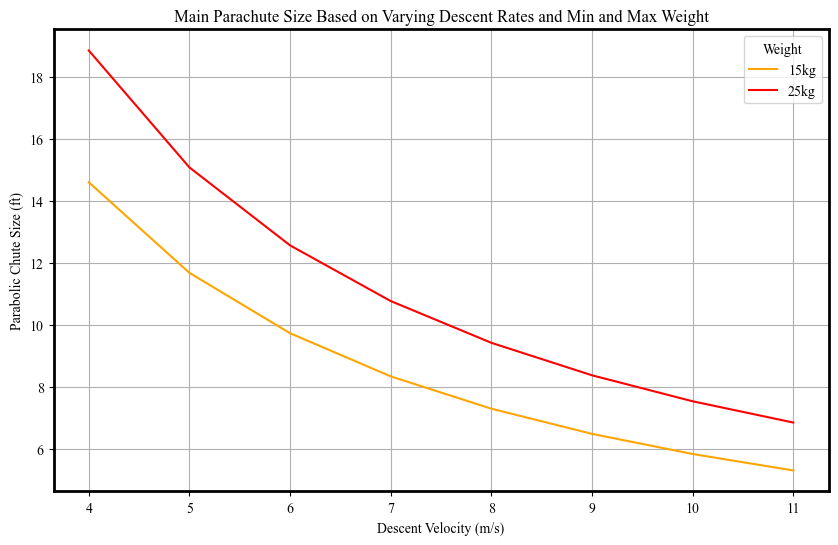

In [13]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes object

# Plot the data
ax.plot(main_df['Velocity'], main_df['Minimum_Parachute_Diameter_ft'],
        label=f'{MIN_DECENT_MASS}kg', color='orange')
ax.plot(main_df['Velocity'], main_df['Maximum_Parachute_Diameter_ft'],
        label=f'{MAX_DECENT_MASS}kg', color='red')

# Setting the plot title and labels
ax.set_title(
    'Main Parachute Size Based on Varying Descent Rates and Min and Max Weight')
ax.set_xlabel('Descent Velocity (m/s)')
ax.set_ylabel('Parabolic Chute Size (ft)')

# Adding a legend to the plot
ax.legend(title='Weight')

# Show grid
ax.grid(True)

# Change spine properties to make the border darker and thicker
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Change color to black or any other color
    spine.set_linewidth(2)  # Change the thickness. Adjust the value as needed.

# Show the plot
plt.show()

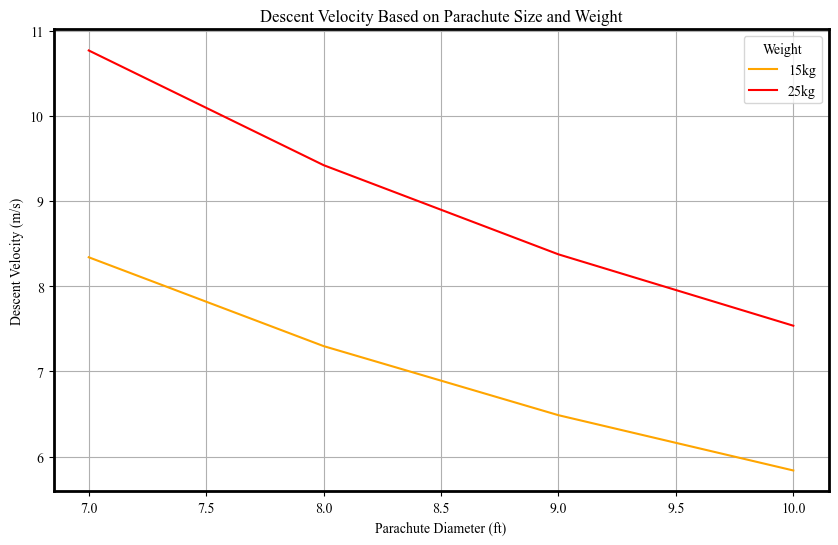

In [14]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes object

# Plot the data
ax.plot(main_velocity_df['Parachute_Diameter_ft'], main_velocity_df[f'{MIN_DECENT_MASS}kg'],
        label=f'{MIN_DECENT_MASS}kg', color='orange')
ax.plot(main_velocity_df['Parachute_Diameter_ft'], main_velocity_df[f'{MAX_DECENT_MASS}kg'],
        label=f'{MAX_DECENT_MASS}kg', color='red')

# Setting the plot title and labels
ax.set_title('Descent Velocity Based on Parachute Size and Weight')
ax.set_xlabel('Parachute Diameter (ft)')
ax.set_ylabel('Descent Velocity (m/s)')

# Adding a legend to the plot
ax.legend(title='Weight')

# Show grid
ax.grid(True)

# Change spine properties to make the border darker and thicker
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Change color to black or any other color
    spine.set_linewidth(2)  # Change the thickness. Adjust the value as needed.

# Show the plot
plt.show()

## Drogue

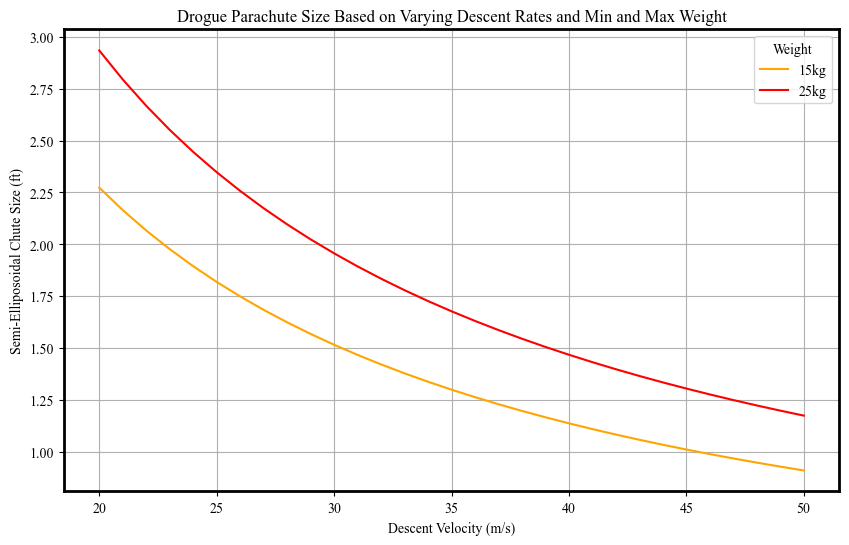

In [15]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes object

# Plot the data
ax.plot(drogue_df['Velocity'], drogue_df['Minimum_Parachute_Diameter_ft'],
        label=f'{MIN_DECENT_MASS}kg', color='orange')
ax.plot(drogue_df['Velocity'], drogue_df['Maximum_Parachute_Diameter_ft'],
        label=f'{MAX_DECENT_MASS}kg', color='red')

# Setting the plot title and labels
ax.set_title(
    'Drogue Parachute Size Based on Varying Descent Rates and Min and Max Weight')
ax.set_xlabel('Descent Velocity (m/s)')
ax.set_ylabel('Semi-Elliposoidal Chute Size (ft)')

# Adding a legend to the plot
ax.legend(title='Weight')

# Show grid
ax.grid(True)

# Change spine properties to make the border darker and thicker
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Change color to black or any other color
    spine.set_linewidth(2)  # Change the thickness. Adjust the value as needed.

# Show the plot
plt.show()

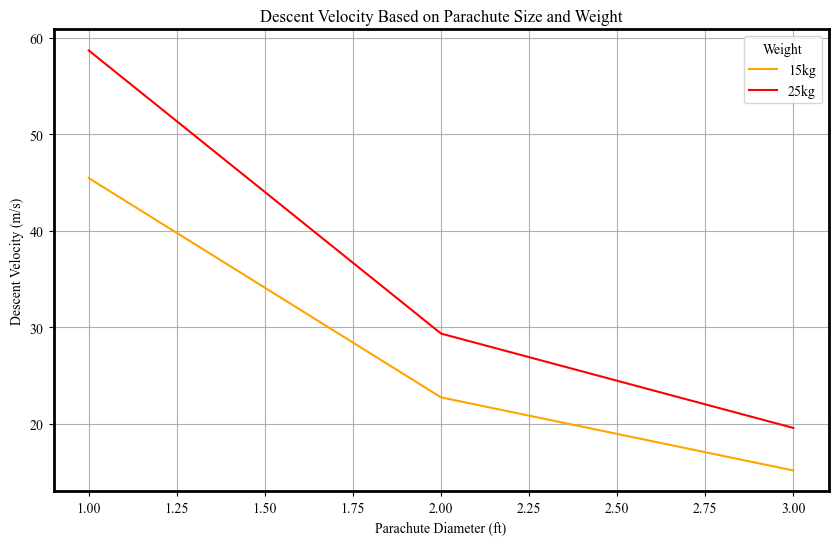

In [16]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and an axes object

# Plot the data
ax.plot(drogue_velocity_df['Parachute_Diameter_ft'], drogue_velocity_df[f'{MIN_DECENT_MASS}kg'],
        label=f'{MIN_DECENT_MASS}kg', color='orange')
ax.plot(drogue_velocity_df['Parachute_Diameter_ft'], drogue_velocity_df[f'{MAX_DECENT_MASS}kg'],
        label=f'{MAX_DECENT_MASS}kg', color='red')

# Setting the plot title and labels
ax.set_title('Descent Velocity Based on Parachute Size and Weight')
ax.set_xlabel('Parachute Diameter (ft)')
ax.set_ylabel('Descent Velocity (m/s)')

# Adding a legend to the plot
ax.legend(title='Weight')

# Show grid
ax.grid(True)

# Change spine properties to make the border darker and thicker
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Change color to black or any other color
    spine.set_linewidth(2)  # Change the thickness. Adjust the value as needed.

# Show the plot
plt.show()